In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/var/folders/6d/m4g0vvg508z0xb6_c6h4qmfm0000gn/T/ipykernel_3493/2274562957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


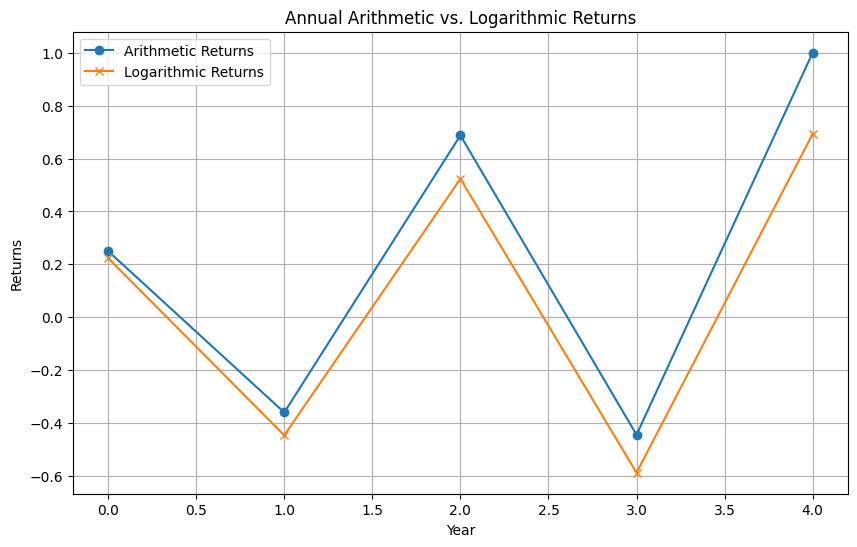

In [2]:
#updated portfolio values
values = np.array([10.0, 12.5, 8.0, 13.5, 7.5, 15.0])

#calculating arithmetic and logarithmic returns
arithmetic_return = (values[1:] - values[:-1])/values[:-1]
log_return = np.log(values[1:]/values[:-1])

#plotting the returns
plt.figure(figsize = (10, 6))
plt.plot(arithmetic_return, label = 'Arithmetic Returns', marker = 'o')
plt.plot(log_return, label = 'Logarithmic Returns', marker = 'x')
plt.title('Annual Arithmetic vs. Logarithmic Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

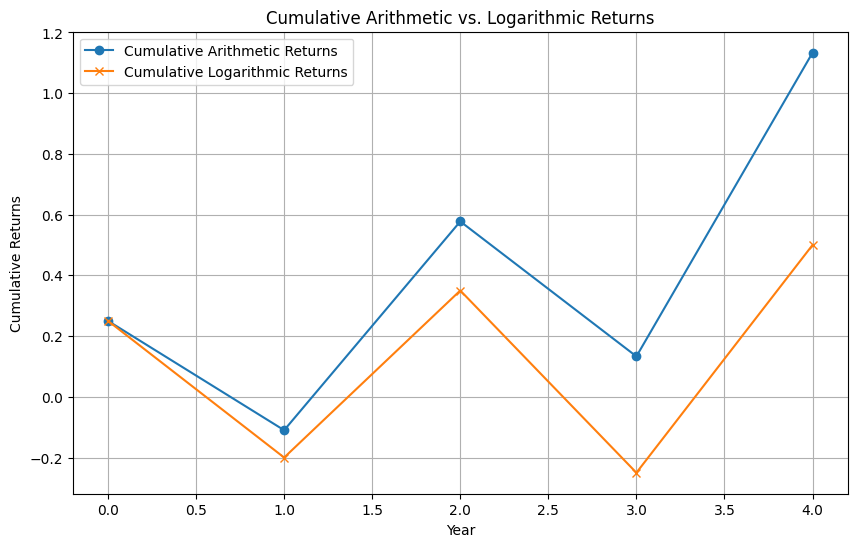

In [3]:
#computing cumulative returns
cumulative_arithmetic_return = np.cumsum(arithmetic_return)
cumulative_log_return = np.exp(np.cumsum(log_return)) - 1

#plotting cumulative returns
plt.figure(figsize = (10, 6))
plt.plot(cumulative_arithmetic_return, label = 'Cumulative Arithmetic Returns', marker = 'o')
plt.plot(cumulative_log_return, label = 'Cumulative Logarithmic Returns', marker = 'x')
plt.title('Cumulative Arithmetic vs. Logarithmic Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Downloading S&P 500 futures data
ticker = "ES=F" #S&P front-month futures ticker symbol
data = yf.download(ticker)

#creating a pandas dataframe
sp500_data = pd.DataFrame(data)
sp500_data.head()

/Users/nossa/Desktop/cassiopee/code/test/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-18,1485.25,1489.75,1462.25,1467.5,1467.5,104794
2000-09-19,1467.00,1482.75,1466.75,1478.5,1478.5,103371
2000-09-20,1478.75,1480.50,1450.25,1469.5,1469.5,109667
2000-09-21,1470.25,1474.00,1455.50,1469.5,1469.5,98528
2000-09-22,1454.75,1471.00,1436.75,1468.5,1468.5,97416


In [5]:
np.array(sp500_data['Adj Close']).shape

(5906,)

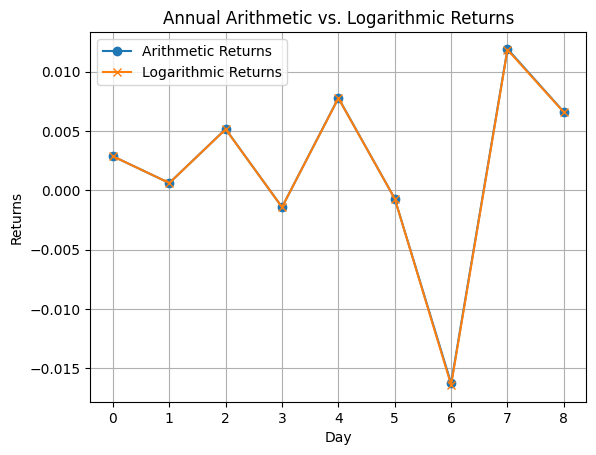

In [6]:
#updated portfolio values
values = np.array(sp500_data['Adj Close'].tail(10))

#calculating arithmetic and logarithmic returns
arithmetic_return = (values[1:] - values[:-1])/values[:-1]
log_return = np.log(values[1:]/values[:-1])

#plotting the returns
#plt.figure(figsize = (10, 6))
plt.plot(arithmetic_return, label = 'Arithmetic Returns', marker = 'o')
plt.plot(log_return, label = 'Logarithmic Returns', marker = 'x')
plt.title('Annual Arithmetic vs. Logarithmic Returns')
plt.xlabel('Day')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

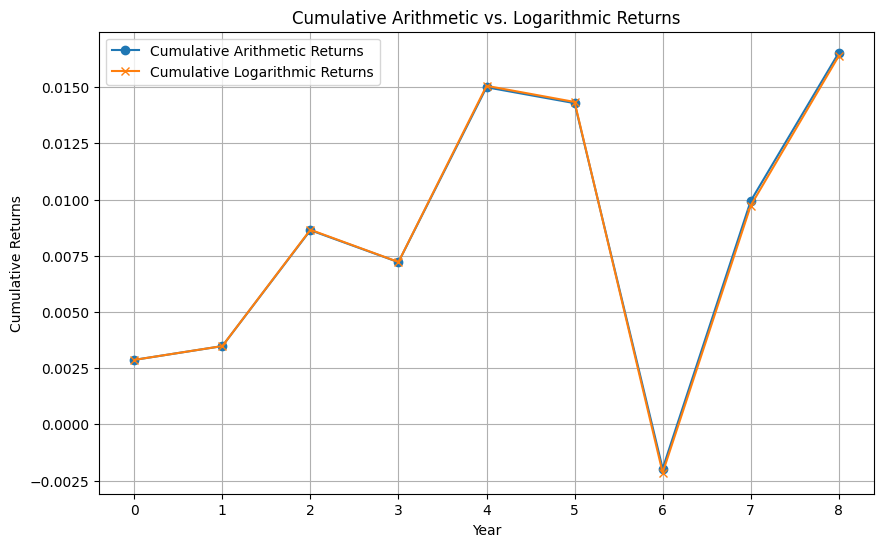

In [7]:
#computing cumulative returns
cumulative_arithmetic_return = np.cumsum(arithmetic_return)
cumulative_log_return = np.exp(np.cumsum(log_return)) - 1

#plotting cumulative returns
plt.figure(figsize = (10, 6))
plt.plot(cumulative_arithmetic_return, label = 'Cumulative Arithmetic Returns', marker = 'o')
plt.plot(cumulative_log_return, label = 'Cumulative Logarithmic Returns', marker = 'x')
plt.title('Cumulative Arithmetic vs. Logarithmic Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Courbe de retour arithmetique et logarithmique semble etre la meme
#Cela peut etre du a des valeurs tres faibles pour ces variables

In [9]:
#annualized return
annualized_return = log_return.mean()*252
annualized_return

0.45520205958923904

In [10]:
#ANNUALIZED VOLATILITY

In [11]:
volatility = log_return.std()
annualized_volatility = volatility*np.sqrt(252)
print('Annualized volatility:', annualized_volatility)

Annualized volatility: 0.12070089881470066


In [12]:
mean, std = log_return.mean(), log_return.std()
# Generating a range of values for the normal distribution
n_bins = int(max(log_return) - min(log_return) * 1000)
norm_dist = np.linspace(min(log_return), max(log_return), n_bins)

In [19]:
import scipy
from scipy.stats import norm
# Calculating the normal distribution with the same mean and std
normal_curve = norm.pdf(norm_dist, mean, std)
norm_dist

array([-0.01639298, -0.0145109 , -0.01262883, -0.01074676, -0.00886469,
       -0.00698262, -0.00510055, -0.00321848, -0.00133641,  0.00054566,
        0.00242773,  0.0043098 ,  0.00619187,  0.00807394,  0.00995601,
        0.01183808])

Text(0.5, 1.0, 'Distribution of S&P 500')

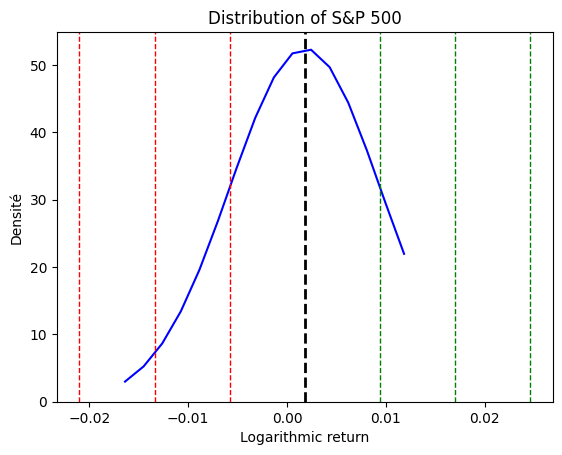

In [40]:
plt.plot(norm_dist,normal_curve, color = 'blue')
plt.hist(normal_curve, bins = norm_dist, color = 'orange')
plt.axvline(mean, color = 'black', linestyle='dashed', linewidth=2, label='Mean Return')
for i in range(1, 4):
    plt.axvline(mean + i*std, color = 'green', linestyle = 'dashed', linewidth=1, label='Mean Return')
    plt.axvline(mean - i*std, color = 'red', linestyle = 'dashed', linewidth=1)
plt.xlabel('Logarithmic return')
plt.ylabel('Densité')
plt.title('Distribution of S&P 500')

In [44]:
skewness = sum([(i - mean)**3 for i in log_return])/(std**3)
kurtosis = sum([(i - mean)**4 for i in log_return])/(std**4)
print(skewness, kurtosis)

-10.721857518145109 36.46367658967597
